# Naive Bayes Classifier

---


This notebook is part of the project about categorize products in hypermarket.


In this notebook, I will focus on build the model using the data crawl and clean in the previous notebook. However, before start building the model, I first done some statistic in  order to find out the distribution.


This notebook contains following functions

---



*   get the data need to be predict
*   split data
*   delete row with certain word
*   google translate
*   plot the distribution
*   NaiveBayesClassifier
*   function to strengthen Classifier 



Dataset used

---


*   new_clean_utf-8.csv
*   partial_data (6).csv
*   品項對照表_partial.csv

















# Content

1.   大潤發資料分析
2.   愛買資料分析
3.   Naive Bayes Classifier (English)
4.   Naive Bayes Classifier (Chinese)
5.   Chinese and English Comparison
6.   Strengthen Model



In [1]:
import nltk.classify.util
import pandas as pd
import numpy as np
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
from sklearn.model_selection import train_test_split

# 大潤發資料

In [4]:
data = pd.read_csv("/content/new_clean_utf-8.csv",encoding = "utf-8", error_bad_lines=True)  #using utf-8 as encoding

In [5]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,0,1,2,3,3.1
0,0,0,0,居家清潔,衣物清潔,洗衣粉,藍寶效 洗衣粉,Sapphire effect washing powder
1,1,1,1,廚房用品,餐盤,碗/筷/湯匙,中空 筷,Hollow Chopsticks Pair
2,2,2,2,戶外休閒,園藝用品,培養土／肥料／園藝器材,竹炭,Bamboo charcoal
3,6,6,6,戶外休閒,園藝用品,培養土／肥料／園藝器材,翠筠 菜圃,Cuijun Vegetable Garden
4,7,7,7,戶外休閒,園藝用品,培養土／肥料／園藝器材,浮雕 盆,Relief basin


get the important data from the whole dataset 

In [6]:
def get_forecast_data(name1,name2,name3,data):   #imput column name x,y and whole dataset
  need = pd.DataFrame()
  need["x"] = data[name1]
  need["y"] = data[name2]
  need["ch_x"] = data[name3]
  return need


In [7]:
new_data = get_forecast_data("3.1","0","3",data)  #only need column 3.1 and 0

In [8]:
new_data

,x,y,ch_x
0,Sapphire effect washing powder,居家清潔,藍寶效 洗衣粉
1,Hollow Chopsticks Pair,廚房用品,中空 筷
2,Bamboo charcoal,戶外休閒,竹炭
3,Cuijun Vegetable Garden,戶外休閒,翠筠 菜圃
4,Relief basin,戶外休閒,浮雕 盆
...,...,...,...
14692,Mosquito coil,居家清潔,蚊香
14693,Mosquito coil,居家清潔,蚊香 器劑
14694,Mosquito coil jar,居家清潔,蚊香 罐
14695,Cockroach syringe,居家清潔,蟑 注射筒


In [9]:
from sklearn.utils import shuffle

def split_data(data_, num):  #imput whole dataset and percentage of training data
  data_ = shuffle(data_)  #shuffle the data before split
  df1 = data_.iloc[:int(len(data_)*num)]
  df2 = data_.iloc[int(len(data_)*num):]
  return df1, df2

In [10]:
count = new_data.groupby("y").count()

In [11]:
count = pd.DataFrame(count)

In [12]:
count = count.reset_index()

find out the category less than 5 sample, since some of the product fail to have category, so I decide to delete them.

In [13]:
del_cate = []    #save the item we want to delete
for i in range(len(count)):
  if count.loc[i,"x"] <= 5:  #5 sample
    del_cate.append(count.loc[i,"y"])
del_cate

['baby磁性學習板',
 '優生超厚乾濕兩用純棉巾90抽(區)',
 '史雲生清雞湯 500ml',
 '嬌生嬰兒活力亮澤洗髮露500ml',
 '嬌生嬰兒活力清新洗髮露500ml',
 '禾聯 2.3kw變頻冷暖氣_客訂商品無法指定到貨日期',
 '禾聯5.0 kw變頻冷暖氣']

In [14]:
def delete_some_row(word, new_data):  #input data: word want to be delete, total dataset
  print(word)
  new_data = new_data[new_data.y != word]
  return new_data
      

In [15]:
for i in range(len(del_cate)):
  new_data = delete_some_row(del_cate[i], new_data)

baby磁性學習板
優生超厚乾濕兩用純棉巾90抽(區)
史雲生清雞湯 500ml
嬌生嬰兒活力亮澤洗髮露500ml
嬌生嬰兒活力清新洗髮露500ml
禾聯 2.3kw變頻冷暖氣_客訂商品無法指定到貨日期
禾聯5.0 kw變頻冷暖氣


In [16]:
rare_cate = ["免運專區","抗菌專區","自有品牌","進口食品"]

In [17]:
for i in range(len(rare_cate)):
  new_data = delete_some_row(rare_cate[i], new_data)

免運專區
抗菌專區
自有品牌
進口食品


In [18]:
count = new_data.groupby("y").count()

In [19]:
count.index.name = 'category'

In [20]:
count

,x,ch_x
category,,
3C電子/配件,186,186
傢俱寢飾,972,968
大型家電/視聽影音,380,380
嬰幼兒與孕婦,171,171
寵物,315,315
小家電專區,293,293
居家清潔,1610,1609
廚房用品,890,890
戶外休閒,795,795


In [21]:
pip install googletrans

     |████████████████████████████████| 61kB 2.8MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 952kB 8.6MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 102kB 9.5MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=eead0a766970526d5aba9fa0df5a5625551119f8128b936b7bb661b5b4d1db06
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=fc117fd8316e6a4c82bc5603244480643bf038e4303e82b142a2fc54512bbc06
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


translate the category name into English, since it is much more difficult to print out in Chinese

In [22]:
from googletrans import Translator
trans = []
for i in range(len(count.index)):
  translator = Translator()   #call translator many time so that it will not be block by Google
  trans.append(translator.translate(count.index[i]).text)
  print(trans)


['3C Electronics/Accessories']
['3C Electronics/Accessories', 'Furniture bedding']
['3C Electronics/Accessories', 'Furniture bedding', 'Large home appliances/audiovisual']
['3C Electronics/Accessories', 'Furniture bedding', 'Large home appliances/audiovisual', 'Infants and pregnant women']
['3C Electronics/Accessories', 'Furniture bedding', 'Large home appliances/audiovisual', 'Infants and pregnant women', 'pet']
['3C Electronics/Accessories', 'Furniture bedding', 'Large home appliances/audiovisual', 'Infants and pregnant women', 'pet', 'Small appliances area']
['3C Electronics/Accessories', 'Furniture bedding', 'Large home appliances/audiovisual', 'Infants and pregnant women', 'pet', 'Small appliances area', 'Home cleaning']
['3C Electronics/Accessories', 'Furniture bedding', 'Large home appliances/audiovisual', 'Infants and pregnant women', 'pet', 'Small appliances area', 'Home cleaning', 'Kitchen supplies']
['3C Electronics/Accessories', 'Furniture bedding', 'Large home appliances/a

By the following graph, it is clearly that the dataset is quite unbalance. However, I would not try to do oversampling or below sampling since the dataset have too little data and it is actually what most hypermarket dataset look like

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, '')

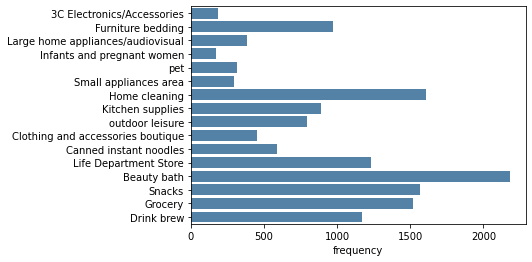

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y =  trans, # 指定條形圖x軸的數據
            x = count["x"], # 指定條形圖y軸的數據
            data = count, # 指定需要繪圖的數據集
            color = 'steelblue', # 指定條形圖的填充色
            orient = 'horizontal' # 將條形圖水平顯示
           )
# 重新設置x軸和y軸的標籤
plt.xlabel("frequency")
plt.ylabel('')

# 愛買資料

In [27]:
#處理方法，用excel來轉檔
love_buy_data = pd.read_csv("/content/partial_data (8).csv", encoding = "utf-8", error_bad_lines=False)


In [28]:
love_buy_data = love_buy_data.drop(0, errors="ignore")

In [29]:
love_buy_data = love_buy_data.reset_index(drop = True)

In [30]:
love_buy_data.head(1)

,Unnamed: 0,0,1,2,3,4,5,6,7,spt_data,noun,lower,small_lower
0,1,超級商城,美食/纖體/保健,飲料/食材/雜貨,沖泡飲品,咖啡,產地嚴選薇薇特南果濾掛咖啡愛買,UCC產地嚴選薇薇特南果濾掛咖啡48G【愛買】 | 愛買線上購物 - Yahoo奇摩超級商城,NaN,產地/嚴選/薇薇特南果/濾掛/咖啡/愛買,嚴選 薇薇特南果 咖啡 愛買,Carefully selected Vivitanango Coffee Love to buy,carefully selected vivitanango coffee love buy


transfer the category into new category

In [31]:
transfer = pd.read_csv("/content/品項對照表_partial.csv")
transfer

,love_data,r_data
0,美顏美體/營養保健,美容沐浴
1,飲料/食材/雜貨,食品雜貨
2,嬰幼/孕媽咪用品,嬰幼兒與孕婦
3,冷凍/生鮮/甜點,食品雜貨
4,小吃熟食/糕餅/零食,零食點心
5,積木/模型/桌遊,生活百貨
6,寵物/水族用品,寵物
7,有機食品,食品雜貨
8,衛生紙棉/日用清潔,居家清潔
9,寢具/家飾,傢俱寢飾


In [32]:
def transfer_to_RT(i, data):
  for j in range(len(transfer)):
    if data.loc[i,"2"] == transfer.loc[j,"love_data"] \
      and data.loc[i,"2"] != "飲料/食材/雜貨":
      data.loc[i,"r_data"] = transfer.loc[j,"r_data"]
      break

    elif data.loc[i,"2"] == "飲料/食材/雜貨":
      k = "3"
      if data.loc[i,k] == "泡麵":
        data.loc[i,"r_data"] = "泡麵罐頭"
      elif data.loc[i,k] == "沖泡飲品":
        data.loc[i,"r_data"] = "飲料沖泡"
      elif data.loc[i,k] == "罐頭食品/調理包":
        data.loc[i,"r_data"] = "泡麵罐頭"
      elif data.loc[i,k] == "茶葉/茶包":
        data.loc[i,"r_data"] = "飲料沖泡"
      elif data.loc[i,k] == "即溶飲料":
        data.loc[i,"r_data"] = "飲料沖泡"
      elif data.loc[i,k] == "礦泉水/桶裝水":
        data.loc[i,"r_data"] = "飲料沖泡"
      else:
        data.loc[i,"r_data"] = "食品雜貨"
      break
  return data

In [33]:
for i in range(len(love_buy_data)):
  #print(i)
  love_buy_data = transfer_to_RT(i, love_buy_data)

In [34]:
love_buy_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,spt_data,noun,lower,small_lower,r_data
0,1,超級商城,美食/纖體/保健,飲料/食材/雜貨,沖泡飲品,咖啡,產地嚴選薇薇特南果濾掛咖啡愛買,UCC產地嚴選薇薇特南果濾掛咖啡48G【愛買】 | 愛買線上購物 - Yahoo奇摩超級商城,NaN,產地/嚴選/薇薇特南果/濾掛/咖啡/愛買,嚴選 薇薇特南果 咖啡 愛買,Carefully selected Vivitanango Coffee Love to buy,carefully selected vivitanango coffee love buy,飲料沖泡
1,2,超級商城,美食/纖體/保健,飲料/食材/雜貨,茶葉/茶包,其他茶品,天仁菊花普洱茶愛買,NaN,NaN,天仁/菊花/普洱茶/愛買,天仁 菊花 普洱茶 愛買,Tenren Chrysanthemum Pu'er Tea Love to buy,tenren chrysanthemum tea love buy,飲料沖泡
2,3,超級商城,美食/纖體/保健,飲料/食材/雜貨,沖泡飲品,麥片/穀物,家樂氏陽光樂活大燕麥片愛買,家樂氏陽光樂活大燕麥片800g*12【愛買】 | 愛買線上購物 - Yahoo奇摩超級商城,NaN,家樂氏/陽光樂活/大燕/麥片/愛買,家樂氏 陽光樂活 大燕 愛買,Kellogg's Sunny Lohas Dayan Loves to Buy,kellogg sunny lohas dayan loves buy,飲料沖泡
3,4,超級商城,美食/纖體/保健,飲料/食材/雜貨,茶葉/茶包,台灣茶/中國茶,世家冷泡茶茉香綠茶愛買,世家冷泡茶茉香綠茶2.5g x20入【愛買】 | 愛買線上購物 - Yahoo奇摩超級商城,NaN,世家/冷/泡茶/茉香/綠茶/愛買,世家 泡茶 茉香 愛買,"Aristocratic tea, jasmine, love to buy",aristocratic tea jasmine love buy,飲料沖泡
4,5,超級商城,美食/纖體/保健,飲料/食材/雜貨,沖泡飲品,麥片/穀物,喜瑞爾巧克力脆片愛買,喜瑞爾巧克力脆片185g【愛買】 | 愛買線上購物 - Yahoo奇摩超級商城,NaN,喜瑞/爾/巧克力/脆片/愛買,喜瑞 巧克力 脆片 愛買,Ambience Chocolate Chips Love Buy,ambience chocolate chips love buy,飲料沖泡


In [35]:
count_ = love_buy_data.groupby("1").count()["0"]

In [36]:
from googletrans import Translator
trans_ = []
for i in range(len(count_.index)):
  translator = Translator()   #call translator many time so that it will not be block by Google
  trans_.append(translator.translate(count_.index[i]).text)
  print(trans_)


['Books/stationery/audio']
['Books/stationery/audio', 'Maternity/Toy/Puzzle']
['Books/stationery/audio', 'Maternity/Toy/Puzzle', 'Home appliances/audio']
['Books/stationery/audio', 'Maternity/Toy/Puzzle', 'Home appliances/audio', 'Home/Bedding/Furniture']
['Books/stationery/audio', 'Maternity/Toy/Puzzle', 'Home appliances/audio', 'Home/Bedding/Furniture', 'Apparel/pajamas']
['Books/stationery/audio', 'Maternity/Toy/Puzzle', 'Home appliances/audio', 'Home/Bedding/Furniture', 'Apparel/pajamas', 'Cleaning/Medical/Pets']
['Books/stationery/audio', 'Maternity/Toy/Puzzle', 'Home appliances/audio', 'Home/Bedding/Furniture', 'Apparel/pajamas', 'Cleaning/Medical/Pets', 'Camera/mobile phone/video game']
['Books/stationery/audio', 'Maternity/Toy/Puzzle', 'Home appliances/audio', 'Home/Bedding/Furniture', 'Apparel/pajamas', 'Cleaning/Medical/Pets', 'Camera/mobile phone/video game', 'Beauty/Cosmetics/Hair Products']
['Books/stationery/audio', 'Maternity/Toy/Puzzle', 'Home appliances/audio', 'Home/B

In [37]:
count_ = pd.DataFrame(count_)

In [38]:
count_.head()

,0
1,
圖書/文具/影音,397
婦幼/玩具/益智,257
家電/影音,1733
居家/寢具/家具,4218
服飾/內睡衣,156


Text(0, 0.5, '')

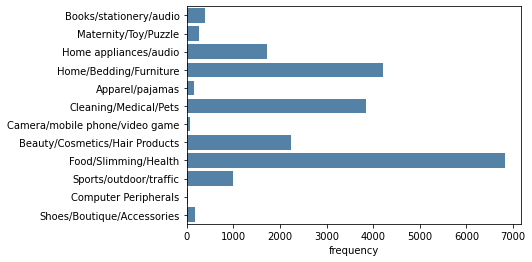

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y =  trans_, # 指定條形圖x軸的數據
            x = count_["0"], # 指定條形圖y軸的數據
            data = count_, # 指定需要繪圖的數據集
            color = 'steelblue', # 指定條形圖的填充色
            orient = 'horizontal'  #將條形圖水平顯示
           )
# 重新設置x軸和y軸的標籤
plt.xlabel("frequency")
plt.ylabel('')

In [40]:
love_buy_need = pd.DataFrame()
love_buy_need["x"] = love_buy_data["small_lower"]
love_buy_need["y"] = love_buy_data["r_data"]
love_buy_need["ch_x"] = love_buy_data["spt_data"]

In [41]:
love_buy_need

,x,y,ch_x
0,carefully selected vivitanango coffee love buy,飲料沖泡,產地/嚴選/薇薇特南果/濾掛/咖啡/愛買
1,tenren chrysanthemum tea love buy,飲料沖泡,天仁/菊花/普洱茶/愛買
2,kellogg sunny lohas dayan loves buy,飲料沖泡,家樂氏/陽光樂活/大燕/麥片/愛買
3,aristocratic tea jasmine love buy,飲料沖泡,世家/冷/泡茶/茉香/綠茶/愛買
4,ambience chocolate chips love buy,飲料沖泡,喜瑞/爾/巧克力/脆片/愛買
...,...,...,...
20971,meat lover,泡麵罐頭,最/划算/咖哩雞/肉/調理/愛買
20972,cheetos taste love buy,零食點心,奇多/隨口/脆/雞汁/口味/愛買
20973,brand gold diamond corn kernels buy,食品雜貨,牛頭/牌/金鑽/玉米粒/罐/愛買
20974,sophie floral love buy,居家清潔,蘇菲/加長型/超薄/護墊/花香/片/愛買


In [42]:
new_data

,x,y,ch_x
0,Sapphire effect washing powder,居家清潔,藍寶效 洗衣粉
1,Hollow Chopsticks Pair,廚房用品,中空 筷
2,Bamboo charcoal,戶外休閒,竹炭
3,Cuijun Vegetable Garden,戶外休閒,翠筠 菜圃
4,Relief basin,戶外休閒,浮雕 盆
...,...,...,...
14692,Mosquito coil,居家清潔,蚊香
14693,Mosquito coil,居家清潔,蚊香 器劑
14694,Mosquito coil jar,居家清潔,蚊香 罐
14695,Cockroach syringe,居家清潔,蟑 注射筒


In [43]:
new_data = new_data.reset_index(drop = True)

In [44]:
for i in range(len(new_data)):
  words = str(new_data.loc[i,"ch_x"]).split(" ")
  new_data.loc[i,"ch_x"] = "/".join(words)
new_data

,x,y,ch_x
0,Sapphire effect washing powder,居家清潔,藍寶效/洗衣粉
1,Hollow Chopsticks Pair,廚房用品,中空/筷/
2,Bamboo charcoal,戶外休閒,竹炭
3,Cuijun Vegetable Garden,戶外休閒,翠筠/菜圃
4,Relief basin,戶外休閒,浮雕/盆
...,...,...,...
14326,Mosquito coil,居家清潔,蚊香
14327,Mosquito coil,居家清潔,蚊香/器劑
14328,Mosquito coil jar,居家清潔,蚊香/罐
14329,Cockroach syringe,居家清潔,蟑/注射筒


In [45]:
total_data = new_data.append(love_buy_need)
print(len(total_data))
total_data = (total_data.dropna())
train, test= split_data(total_data, 0.9) #set 0.8 percentage of data as train  data

35307


In [46]:
extra_data = pd.DataFrame(total_data)

In [47]:
extra_data.head()

,x,y,ch_x
0,Sapphire effect washing powder,居家清潔,藍寶效/洗衣粉
1,Hollow Chopsticks Pair,廚房用品,中空/筷/
2,Bamboo charcoal,戶外休閒,竹炭
3,Cuijun Vegetable Garden,戶外休閒,翠筠/菜圃
4,Relief basin,戶外休閒,浮雕/盆


In [48]:
total_data

,x,y,ch_x
0,Sapphire effect washing powder,居家清潔,藍寶效/洗衣粉
1,Hollow Chopsticks Pair,廚房用品,中空/筷/
2,Bamboo charcoal,戶外休閒,竹炭
3,Cuijun Vegetable Garden,戶外休閒,翠筠/菜圃
4,Relief basin,戶外休閒,浮雕/盆
...,...,...,...
20971,meat lover,泡麵罐頭,最/划算/咖哩雞/肉/調理/愛買
20972,cheetos taste love buy,零食點心,奇多/隨口/脆/雞汁/口味/愛買
20973,brand gold diamond corn kernels buy,食品雜貨,牛頭/牌/金鑽/玉米粒/罐/愛買
20974,sophie floral love buy,居家清潔,蘇菲/加長型/超薄/護墊/花香/片/愛買


In [49]:
print(len(train))
print(len(test))

31368
3486


# Naive Bayes Classifier (English)


In [50]:
def word_feats(words):  #return a dictionary back
    if words == "":
      return dict([(words, False)])
    else:
      return dict([(words, True)])

In [51]:
positive_vocab = ["happy", "man"]
def get_features(list, feature):  #get the feature and attach it to product
  features = [(word_feats(fea),feature) for fea in feature]


positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]

In [52]:
positive_features

[({'happy': True}, 'pos'), ({'man': True}, 'pos')]

In [53]:
train = train.reset_index() #reset the index
test = test.reset_index()

In [54]:
feature = []
for i in range(int(len(train))):
  a_ = str((train.loc[i,"x"])).split(" ")
  feature += ([(word_feats(a), train.loc[i,"y"]) for a in a_])
print(feature)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [55]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
classifier = NaiveBayesClassifier.train(feature) 
print(nltk.classify.accuracy(classifier,feature))

0.5282839260952666


In [56]:
classifier.show_most_informative_features(1000)

Most Informative Features
                    food = True               寵物 : 居家清潔   =    813.7 : 1.0
                standard = True           大型家電/視 : 食品雜貨   =    609.3 : 1.0
                   house = True           大型家電/視 : 美容沐浴   =    601.6 : 1.0
                 machine = True            小家電專區 : 美容沐浴   =    413.9 : 1.0
                     Cat = True               寵物 : 居家清潔   =    361.0 : 1.0
                 luggage = True           服飾與配件精 : 美容沐浴   =    350.2 : 1.0
                     fan = True            小家電專區 : 居家清潔   =    304.3 : 1.0
                  Flower = True           服飾與配件精 : 零食點心   =    284.1 : 1.0
                   pants = True           服飾與配件精 : 美容沐浴   =    274.5 : 1.0
                  shower = True             美容沐浴 : 居家清潔   =    267.9 : 1.0
                    lock = True             廚房用品 : 居家清潔   =    265.9 : 1.0
                  powder = True             飲料沖泡 : 零食點心   =    262.8 : 1.0
                   light = True             生活百貨 : 食品雜貨   =    248.9 : 1.0

The following function is to find the most common word in 
the list, and if there are many word with same frequency, 
this function will pick the last word in the list.

In [57]:
rem = []
def get_largest_number(list_,num):
  x = Counter(list_).most_common()
  #print((x))
  try:
    if x[num][1] == x[num+1][1]:
      rem.append("have_the_same")
      #print(num)
      return get_largest_number(list_, num+1)
    else:
      #rem = []
      return x[num][0]
  except:
    try:
      return x[num][0]
    except:
      return "無法分類"

In [58]:
from collections import Counter

x = ["a","a","b","b","c","c","c"]
get_largest_number(x, 0)
print(rem)

[]


In [59]:
save_wrong_pair = []
def wrong_pair(ans, pred):
  save_wrong_pair.append((ans, pred))

In [60]:
#need to debug here
from collections import Counter
count = 0
for i in range(len(test)):
  word = str(test.loc[i,"x"])
  #print(word)
  words = word.split(" ")
  guess = []
  for j in range(len(words)):
    #print(words[j])
    guess.append(classifier.classify(word_feats(words[j])))
  #print(guess, "ans =" ,test.loc[i,"y"], test.loc[i,"x"])
  ans = get_largest_number(guess, 0)
  if test.loc[i,"y"]==ans:
    count = count + 1
  else:
    wrong_pair(test.loc[i,"y"] ,ans)
    print("guess = ",ans," ","correct = ",test.loc[i,"y"])
    print(words)
print(count/len(test))

guess =  居家清潔   correct =  生活百貨
['cockroach', 'love', 'cockroach', 'bait', 'agent', 'love', 'buy']
guess =  居家清潔   correct =  美容沐浴
['chevrolet', 'lotion', 'love', 'buy']
guess =  居家清潔   correct =  食品雜貨
['taste', 'love', 'wheat', 'tea', 'love', 'buy']
guess =  居家清潔   correct =  食品雜貨
['love', 'buy']
guess =  零食點心   correct =  泡麵罐頭
['cake']
guess =  居家清潔   correct =  小家電專區
['le', 'jin', 'love', 'buy']
guess =  居家清潔   correct =  廚房用品
['natural', 'wind', 'pastel', 'spoon', 'love', 'buy']
guess =  居家清潔   correct =  食品雜貨
['ancient', 'road', 'plums', 'love', 'buy']
guess =  居家清潔   correct =  生活百貨
['love', 'buy']
guess =  居家清潔   correct =  零食點心
['shushui', 'xuan', 'mini', 'love', 'buy']
guess =  居家清潔   correct =  飲料沖泡
['ancient', 'road', 'plums', 'love', 'buy']
guess =  居家清潔   correct =  零食點心
['value', 'pringles', 'salt', 'chicken', 'love', 'buy']
guess =  居家清潔   correct =  服飾與配件精品
['cotton']
guess =  食品雜貨   correct =  零食點心
['Tarzan', 'jar']
guess =  居家清潔   correct =  美容沐浴
['yixuan', 'love', 'b

In [61]:
Counter(save_wrong_pair).most_common()

[(('美容沐浴', '居家清潔'), 221),
 (('食品雜貨', '居家清潔'), 186),
 (('生活百貨', '居家清潔'), 176),
 (('零食點心', '居家清潔'), 144),
 (('廚房用品', '居家清潔'), 108),
 (('戶外休閒', '居家清潔'), 80),
 (('飲料沖泡', '居家清潔'), 63),
 (('傢俱寢飾', '居家清潔'), 62),
 (('大型家電/視聽影音', '居家清潔'), 39),
 (('服飾與配件精品', '居家清潔'), 36),
 (('小家電專區', '居家清潔'), 34),
 (('泡麵罐頭', '居家清潔'), 30),
 (('嬰幼兒與孕婦', '居家清潔'), 26),
 (('飲料沖泡', '食品雜貨'), 26),
 (('食品雜貨', '零食點心'), 24),
 (('泡麵罐頭', '食品雜貨'), 21),
 (('零食點心', '食品雜貨'), 17),
 (('飲料沖泡', '零食點心'), 17),
 (('居家清潔', '美容沐浴'), 15),
 (('泡麵罐頭', '零食點心'), 14),
 (('生活百貨', '美容沐浴'), 12),
 (('戶外休閒', '食品雜貨'), 12),
 (('3C電子/配件', '居家清潔'), 11),
 (('居家清潔', '生活百貨'), 11),
 (('食品雜貨', '飲料沖泡'), 11),
 (('生活百貨', '廚房用品'), 11),
 (('戶外休閒', '廚房用品'), 9),
 (('食品雜貨', '美容沐浴'), 9),
 (('廚房用品', '生活百貨'), 9),
 (('寵物', '居家清潔'), 7),
 (('零食點心', '飲料沖泡'), 7),
 (('美容沐浴', '食品雜貨'), 6),
 (('食品雜貨', '泡麵罐頭'), 6),
 (('廚房用品', '零食點心'), 6),
 (('美容沐浴', '飲料沖泡'), 6),
 (('傢俱寢飾', '美容沐浴'), 6),
 (('戶外休閒', '傢俱寢飾'), 5),
 (('嬰幼兒與孕婦', '美容沐浴'), 5),
 (('小家電專區', '大型家電/視聽影音'), 5),
 (('零食點心', '美

#  Naive Bayes Classifier (Chinese)

In [62]:
not_necessary_word = pd.read_csv("/content/not_necessary_word_2.csv")

In [63]:
not_necessary_word.head()

,Row Labels
0,刀
1,好
2,肉
3,自動
4,乳液


In [64]:
not_necessary = not_necessary_word["Row Labels"]

In [65]:
def delete_unnecessary_word(list_):
  trash_list = []
  for i in range(len(list_)):
    for j in range(len(not_necessary)):
      if list_[i] == not_necessary[j]:
        trash_list.append(list_[i])
        continue

  if len(trash_list) == len(list_):
    return list_
  else:
    s1 = set(trash_list)
    s2 = set(list_)
    #print(s1, s2)
    #print(s2.difference(s1))
    return list(s2.difference(s1))

In [66]:
one_char_word = []
def delete_less_than_one(words):
  try:
    for i in range(len(words)):
      if len(words[i]) < 2:
        one_char_word.append(words[i])
        print(words[i])
      return words
  except:
    print("no item")
    return " "

In [67]:
import random

print(random.random())

0.15559312695698324


In [68]:
ch_feature = []
for i in range(int(len(train))):
  if train.loc[i,"y"] == "居家清潔" and random.random() > 0.9:
    continue
  a_ = str((train.loc[i,"ch_x"])).split("/")
  a_ = [x for x in a_ if str(x) != 'nan']
  #a_ = delete_less_than_one(a_)
  try:
    if len(a_) >= 2:
      a_ = delete_unnecessary_word(a_)
  except:
    continue
  ch_feature += ([(word_feats(a), train.loc[i,"y"]) for a in a_])
print(ch_feature)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [69]:
set_ = {}
print(len(set_))

0


In [70]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
classifier_ch = NaiveBayesClassifier.train(ch_feature) 
print(nltk.classify.accuracy(classifier_ch,ch_feature))

0.7296986518636003


In [71]:
classifier_ch.show_most_informative_features(500)

Most Informative Features
                       貓 = True               寵物 : 居家清潔   =    597.3 : 1.0
                       褲 = True           服飾與配件精 : 美容沐浴   =    490.0 : 1.0
                       含 = True           大型家電/視 : 食品雜貨   =    391.2 : 1.0
                      標準 = True           大型家電/視 : 食品雜貨   =    370.8 : 1.0
                      行李 = True           服飾與配件精 : 美容沐浴   =    333.7 : 1.0
                      嬰兒 = True           嬰幼兒與孕婦 : 美容沐浴   =    275.5 : 1.0
                      冷凍 = True             食品雜貨 : 大型家電/視 =    273.8 : 1.0
                      白光 = True             生活百貨 : 美容沐浴   =    223.3 : 1.0
                      奶粉 = True             飲料沖泡 : 食品雜貨   =    195.2 : 1.0
                       餅 = True             零食點心 : 美容沐浴   =    192.9 : 1.0
                      大王 = True           嬰幼兒與孕婦 : 食品雜貨   =    181.6 : 1.0
                      號片 = True           嬰幼兒與孕婦 : 美容沐浴   =    172.9 : 1.0
                      保鮮 = True             廚房用品 : 生活百貨   =    169.6 : 1.0

In [72]:

from collections import Counter

count = 0
count_rem_w = 0
count_rem = 0
count_rem_1 = 0
count_rem_n = 0
for i in range(len(test)):
  word = str(test.loc[i,"ch_x"])
  #print(word)
  words = word.split("/")
  words = delete_unnecessary_word(words)
  words = [x for x in words if str(x) != 'nan']
  guess = []
  for j in range(len(words)):
    #print(words[j])
    guess.append(classifier_ch.classify(word_feats(words[j])))
  #print(guess, "ans =" ,test.loc[i,"y"], test.loc[i,"x"])
  ans = get_largest_number(guess, 0)
  if len(rem):
    count_rem = count_rem + 1 

  if test.loc[i,"y"]==ans:
    count = count + 1
  else:
    if len(rem):
      count_rem_w = count_rem_w + 1
      if len(rem) == 1:
        count_rem_1 = count_rem_1 + 1
      else:
        count_rem_n = count_rem_n + 1
    print("guess = ",ans," ","correct = ",test.loc[i,"y"])
    wrong_pair(test.loc[i,"y"] ,ans)
    print(words)
  rem = []
print("多元判斷的機率 = ", count_rem / len(test))
print("多數決情況成功機率",(count -  count_rem + count_rem_w) / (len(test) - count_rem))
print("在錯誤情況下多元判斷失敗機率 = ", count_rem_w / (len(test) - count))
print("多元判斷錯誤下一，為一元之機率 = ", count_rem_1 / count_rem_w)
print(count/len(test))

guess =  居家清潔   correct =  生活百貨
['蟑愛呷', '蟑餌', '強效', '愛買', '殺']
guess =  零食點心   correct =  泡麵罐頭
['餅']
guess =  居家清潔   correct =  小家電專區
['濕', '拖', '樂金', '清潔', '愛買', '機器']
guess =  飲料沖泡   correct =  食品雜貨
['愛買', '古道', '梅子']
guess =  美容沐浴   correct =  服飾與配件精品
['棉']
guess =  嬰幼兒與孕婦   correct =  居家清潔
['愛買', '拭', '拭樂', '保濕蓋']
guess =  泡麵罐頭   correct =  零食點心
['泰山', '罐']
guess =  美容沐浴   correct =  戶外休閒
['外用']
guess =  居家清潔   correct =  嬰幼兒與孕婦
['柔', '寶寶', '棉型', '濕紙巾', '滿意', '愛買']
guess =  生活百貨   correct =  廚房用品
['愛買', '省力', '剪刀']
guess =  食品雜貨   correct =  零食點心
['裝克', '果粒', '榛果', '德芙']
guess =  美容沐浴   correct =  泡麵罐頭
['咖椰', '椰香', '抹醬', '吐司']
guess =  生活百貨   correct =  3C電子/配件
['喇叭']
guess =  廚房用品   correct =  傢俱寢飾
['力士']
guess =  居家清潔   correct =  廚房用品
['愛買']
guess =  美容沐浴   correct =  戶外休閒
['空心']
guess =  美容沐浴   correct =  食品雜貨
['馬卡日份']
guess =  居家清潔   correct =  廚房用品
['箭', '酒精']
guess =  零食點心   correct =  寵物
['條包']
guess =  零食點心   correct =  食品雜貨
['愛買', '酥片']
guess =  傢俱寢飾   correct =  戶外休閒
['彩

In [73]:
from collections import Counter
w = Counter(save_wrong_pair)

In [74]:
w.most_common(10)

[(('美容沐浴', '居家清潔'), 254),
 (('生活百貨', '居家清潔'), 207),
 (('食品雜貨', '居家清潔'), 199),
 (('零食點心', '居家清潔'), 155),
 (('廚房用品', '居家清潔'), 123),
 (('戶外休閒', '居家清潔'), 98),
 (('傢俱寢飾', '居家清潔'), 72),
 (('飲料沖泡', '居家清潔'), 67),
 (('食品雜貨', '零食點心'), 50),
 (('飲料沖泡', '食品雜貨'), 49)]

In [75]:
train.groupby("y").count()["ch_x"]

y
3C電子/配件       262
傢俱寢飾         1601
大型家電/視聽影音    1430
嬰幼兒與孕婦        331
寵物            369
小家電專區         565
居家清潔         4848
廚房用品         2134
戶外休閒         1551
服飾與配件精品       743
泡麵罐頭          734
生活百貨         2577
美容沐浴         4813
零食點心         3672
食品雜貨         3778
飲料沖泡         1960
Name: ch_x, dtype: int64





# Chinese and English comparison

In [76]:
test

,index,x,y,ch_x
0,6176,cockroach love cockroach bait agent love buy,生活百貨,蟑愛呷/強效/殺/蟑餌/劑/愛買
1,14149,chevrolet lotion love buy,美容沐浴,雪芙蘭/滋養/乳液/清爽型/愛買
2,4394,taste love wheat tea love buy,食品雜貨,愛之味/麥仔茶/愛買
3,2926,love buy,食品雜貨,可口可樂/愛買
4,9375,new subtropical wiper love buy,戶外休閒,新款/亞熱帶/雨刷/愛買
...,...,...,...,...
3481,12791,Big wave package,零食點心,大波浪/合包
3482,11766,good god cloth love buy,居家清潔,好神/拖/輕巧/手壓/旋轉/拖拖/布/愛買
3483,3301,hand seaweed mustard taste love buy,零食點心,相撲/手脆/紫菜/芥末/口味/愛買
3484,7791,Tefal Marble,廚房用品,特福/大理石


In [77]:
ch_right = []
def count_what_right_ch(index):
  ch_right.append(index)

eg_right = []
def count_what_right_eg(index):
  eg_right.append(index)

model without using "function unnecessary list"

In [78]:
count_diff = 0
count_ch = 0
count_eg = 0
count_egR = 0
count_chR = 0
count_RR = 0
count_ww = 0
for i in range(len(test)):
  print(" ")
  word = str(test.loc[i,"ch_x"])
  print(word)
  words = word.split("/")
  ch_guess = []
  for j in range(len(words)):
    #print(words[j])
    ch_guess.append(classifier_ch.classify(word_feats(words[j])))
  #print(guess, "ans =" ,test.loc[i,"y"], test.loc[i,"x"])
  ch_ans = get_largest_number(ch_guess, 0)
  if ch_ans == test.loc[i,"y"]:
    count_what_right_ch(ch_ans)
    count_ch = count_ch + 1

  word = str(test.loc[i,"x"])
  print(word)
  words = word.split(" ")
  guess = []
  for j in range(len(words)):
    #print(words[j])
    guess.append(classifier.classify(word_feats(words[j])))
  #print(guess, "ans =" ,test.loc[i,"y"], test.loc[i,"x"])
  ans = get_largest_number(guess, 0)
  if ans == test.loc[i,"y"]:
    count_what_right_eg(ans)
    count_eg = count_eg + 1

  if ch_ans != ans:
    count_diff = count_diff + 1
    print("chinese_guess", ch_ans)
    print("guess", ans)

  if ch_ans != test.loc[i,"y"] and ans == test.loc[i,"y"]:
    count_egR = count_egR + 1
  if ch_ans == test.loc[i,"y"] and ans != test.loc[i,"y"]:
    count_chR = count_chR + 1
  if ch_ans != test.loc[i,"y"] and ans != test.loc[i,"y"]:
    count_ww = count_ww + 1
  if ch_ans == test.loc[i,"y"] and ans == test.loc[i,"y"]:
    count_RR = count_RR + 1

print("chinese = ",count_ch / len(test))
print("eg = ",count_eg / len(test))
print("only english right", count_egR / len(test))
print("only chinese right", count_chR / len(test))
print("both right", count_RR / len(test))
print("both wrong", count_ww / len(test))
print(count_diff / len(test))

串流輸出內容已截斷至最後 5000 行。
 
水平衡/香水
Water balance perfume
chinese_guess 居家清潔
guess 美容沐浴
 
罐/貓/魚
Can of catfish
chinese_guess 泡麵罐頭
guess 居家清潔
 
精梳棉/平口/褲
Combed cotton flat pants
 
最/划算/洗衣/籃/愛買
laundry love buy
 
黑色
black
chinese_guess 生活百貨
guess 食品雜貨
 
滿庭/香香/氛/黑松/茉
Man Court Fragrance Black Pine Jasmine
chinese_guess 居家清潔
guess 飲料沖泡
 
立頓/奶茶/粉/東方/焙香/烏龍/量販/愛買
lipton milk tea powder oriental fragrance
 
罐
tank
chinese_guess 泡麵罐頭
guess 居家清潔
 
居家/塑膠/保護/墊/愛買
home plastic love buy
chinese_guess 美容沐浴
guess 居家清潔
 
物件/公主/恕
Princess forgiveness
 
超值/多功能/影/印紙/磅/張/愛買
super value movie love buy
chinese_guess 3C電子/配件
guess 居家清潔
 
孔雀/心/餅/布丁
Peacock Heart Cake Pudding
 
吉納/掀蓋/垃圾/中/愛買
gina trash love buy
 
優質/耐熱/咖啡杯/愛買
high quality coffee cup love buy
chinese_guess 廚房用品
guess 居家清潔
 
蚊
mosquito
chinese_guess 小家電專區
guess 生活百貨
 
巧益/冬筍/餅/愛買
qiaoyi love buy
chinese_guess 零食點心
guess 居家清潔
 
金莎/巧克力/粒/愛買
jinsha chocolate love buy
 
中元/好兄弟/量/販合贈/普渡/旗/愛買
zhongyuan good brother quantity purdue flag love buy
chinese_guess 

In [79]:
from collections import Counter
print("eg",Counter(eg_right))
print("ch",Counter(ch_right))

eg Counter({'居家清潔': 471, '美容沐浴': 307, '零食點心': 243, '食品雜貨': 161, '大型家電/視聽影音': 115, '飲料沖泡': 102, '廚房用品': 100, '生活百貨': 89, '傢俱寢飾': 71, '戶外休閒': 43, '服飾與配件精品': 37, '泡麵罐頭': 16, '寵物': 16, '小家電專區': 16, '3C電子/配件': 4, '嬰幼兒與孕婦': 1})
ch Counter({'美容沐浴': 510, '居家清潔': 441, '零食點心': 354, '食品雜貨': 264, '生活百貨': 176, '廚房用品': 160, '飲料沖泡': 145, '大型家電/視聽影音': 142, '傢俱寢飾': 88, '戶外休閒': 76, '服飾與配件精品': 57, '泡麵罐頭': 49, '小家電專區': 37, '寵物': 17, '嬰幼兒與孕婦': 12, '3C電子/配件': 10})


# Strengthen Model


In [80]:
len(train)

31368

In [81]:
train.head()

,index,x,y,ch_x
0,6976,baishui love buy,居家清潔,白蘭/漂/白水/愛買
1,2031,little raccoon seaweed classic spicy love buy,零食點心,小/浣熊/烤/海苔/經典/辣味/愛買
2,13103,Herb,美容沐浴,草本
3,9610,lianfu yili sorting love buying,傢俱寢飾,超值/聯府號/易利/掀蓋/整理/愛買
4,4375,Tianren Alishan Tea,飲料沖泡,天仁/阿里山/茶


*TF-IDF*

---





Fail to have good effect

In [82]:
X = vectorizer.fit_transform(list(train["ch_x"]))
word = vectorizer.get_feature_names()
print(word)
#查看词频结果
print(X.toarray())

NameError: ignored

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
 
#语料
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
#将文本中的词语转换为词频矩阵
vectorizer = CountVectorizer()
#计算个词语出现的次数
X = vectorizer.fit_transform(corpus)
#获取词袋中所有文本关键词
word = vectorizer.get_feature_names()
print(word)
#查看词频结果
print (X.toarray())
 
from sklearn.feature_extraction.text import TfidfTransformer
 
#类调用
transformer = TfidfTransformer()
print(transformer)
#将词频矩阵X统计成TF-IDF值
tfidf = transformer.fit_transform(X)
#查看数据结构 tfidf[i][j]表示i类文本中的tf-idf权重
print (tfidf.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]
TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)
[[0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]
 [0.         0.27230147 0.         0.27230147 0.         0.85322574
  0.22262429 0.         0.27230147]
 [0.55280532 0.         0.         0.         0.55280532 0.
  0.28847675 0.55280532 0.        ]
 [0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]]


In [84]:
from sklearn.feature_extraction.text import CountVectorizer
 

#将文本中的词语转换为词频矩阵
vectorizer = CountVectorizer()
#计算个词语出现的次数
X = vectorizer.fit_transform(list(train["ch_x"]))
#获取词袋中所有文本关键词
word = vectorizer.get_feature_names()
print(word)
#查看词频结果
print(X.toarray())
 
from sklearn.feature_extraction.text import TfidfTransformer
 
#类调用
transformer = TfidfTransformer()
print(transformer)
#将词频矩阵X统计成TF-IDF值
tfidf = transformer.fit_transform(X)
#查看数据结构 tfidf[i][j]表示i类文本中的tf-idf权重
print (sum(tfidf.toarray()))

['nan', '一下', '一亞爵', '一分', '一分鐘', '一刻', '一匙', '一口', '一合', '一壺', '一夜', '一天', '一字', '一家', '一對一', '一小', '一度', '一擊', '一日', '一星', '一次性', '一減', '一滴', '一片', '一珈', '一番', '一百', '一級', '一經', '一般', '一起', '一食', '一香', '一體', '一點', '丁小', '丁尼亞', '丁桔色', '丁色', '丁號', '丁香', '七喜', '七層', '七彩', '七星', '七果', '丈青', '三彩', '三明治', '三星', '三格', '三洋', '三益', '三益菌', '三碼', '三花平口', '三菱', '三角形', '三角架', '三鋒', '上好佳', '上山', '上腊', '上菜', '上賓', '上進', '上選', '上鉤', '上龍', '下單', '下型', '下巴', '下濾', '不了', '不住', '不倒翁', '不含', '不掉', '不沾單', '不沾平', '不沾耳', '不沾膠', '不沾鍋', '不沾雪', '不甜', '不能', '不辣', '不銹鋼', '不鋼', '不鏽', '不鏽鋼', '不飽和', '世家', '世界', '丫環', '中健', '中元', '中吉納', '中圓', '中型', '中塑', '中小', '中平', '中度', '中式', '中張', '中彩', '中性', '中排', '中文', '中文版', '中新社', '中柄', '中桶', '中條', '中楷', '中段', '中毛', '中水', '中漏', '中祥', '中空', '中立', '中統', '中繼', '中美雅', '中腰', '中花', '中華', '中衛', '中西', '中辛', '中辣', '中農', '中量', '中量級', '中門', '中青', '中頂旺', '中顆', '丰潤', '串串', '串燒', '丸型', '丸子', '丸形', '丸田', '丸莊', '丹心', '主修', '主動式', '主張', '主管', '主義', '主食', '主體', '久留米', '之初', '之味', '之寶', '之戀', '

In [85]:
def bad_prediction_word(word, pred, ans):
  bad_word.append(word)
  bad_prediction.append(pred)
  right_ans.append(ans)

In [86]:
A = []
len(A)

0

In [87]:
#need to debug here
bad_word = []
bad_prediction = []
right_ans = []
count_rem = 0
count_rem_w = 0
from collections import Counter
count = 0
for i in range(len(train)):
  word = str(train.loc[i,"ch_x"])
  #print(word)
  #print(word)
  words = word.split("/")
  guess = []
  for j in range(len(words)):
    #print(words[j])
    if words[j] == "nan":
      continue
    word_pre = classifier_ch.classify(word_feats(words[j]))
    guess.append(word_pre)
    if word_pre != train.loc[i,"y"]:
      bad_prediction_word(words[j], word_pre, train.loc[i,"y"])
  #print(guess, "ans =" ,test.loc[i,"y"], test.loc[i,"x"])
  ans = get_largest_number(guess, 0)
  print(rem)
  if len(rem):
    count_rem = count_rem + 1 

  if train.loc[i,"y"] == ans:
    count = count + 1
    #print(count)
  else:
    print("guess = ",ans," ","correct = ",train.loc[i,"y"])
    if len(rem):
      count_rem_w = count_rem_w + 1 
    print(words)
    print(guess)
  rem = []

print("多元判斷的機率 = ", count_rem / len(train))
print("在錯誤情況下多元判斷失敗機率 = ", count_rem_w / (len(train) - count))
print("預測率 = ",count / len(train))
#print(bad_prediction)

串流輸出內容已截斷至最後 5000 行。
[]
['have_the_same']
guess =  居家清潔   correct =  生活百貨
['雷達', '液體', '電', '蚊香', '晚', '經濟型', '愛買']
['生活百貨', '美容沐浴', '小家電專區', '居家清潔', '生活百貨', '3C電子/配件', '居家清潔']
[]
[]
[]
['have_the_same']
guess =  美容沐浴   correct =  傢俱寢飾
['明家開', '插', '電腦', '延長線', '愛買']
['生活百貨', '美容沐浴', '生活百貨', '美容沐浴', '居家清潔']
[]
[]
['have_the_same', 'have_the_same']
guess =  零食點心   correct =  小家電專區
['松木', '不銹鋼', '品味']
['小家電專區', '生活百貨', '零食點心']
[]
[]
[]
[]
guess =  美容沐浴   correct =  居家清潔
['百利', '長效', '型', '菜瓜布', '馬', '刷', '愛買']
['居家清潔', '美容沐浴', '美容沐浴', '居家清潔', '美容沐浴', '美容沐浴', '居家清潔']
[]
guess =  美容沐浴   correct =  傢俱寢飾
['透明', '椅腳套', '中', '愛買']
['美容沐浴', '傢俱寢飾', '美容沐浴', '居家清潔']
[]
['have_the_same']
guess =  美容沐浴   correct =  嬰幼兒與孕婦
['嬌生', '嬰兒', '牛奶', '純米', '潤膚乳', '液', '愛買']
['嬰幼兒與孕婦', '嬰幼兒與孕婦', '零食點心', '美容沐浴', '美容沐浴', '戶外休閒', '居家清潔']
[]
[]
[]
[]
[]
[]
[]
[]
guess =  居家清潔   correct =  廚房用品
['超大', '排', '油煙機', '濾油', '棉網', '愛買']
['美容沐浴', '食品雜貨', '廚房用品', '居家清潔', '居家清潔', '居家清潔']
[]
guess =  美容沐浴   correct =  居家清潔


In [88]:
problem = pd.DataFrame(bad_word)
problem["bad_prediction"] = bad_prediction
problem["right_ans"] = right_ans

In [89]:
problem.sort_values(by = [0])

,0,bad_prediction,right_ans
4627,,傢俱寢飾,大型家電/視聽影音
47354,,傢俱寢飾,廚房用品
6187,,傢俱寢飾,廚房用品
41768,,傢俱寢飾,廚房用品
22178,,傢俱寢飾,食品雜貨
...,...,...,...
51304,龍族,居家清潔,廚房用品
7699,龍頭,廚房用品,美容沐浴
50798,龍頭,廚房用品,美容沐浴
37340,龍頭,廚房用品,美容沐浴


In [ ]:
from google.colab import files

problem.to_csv("problem_value.csv", encoding = "utf-8-sig")
files.download('problem_value.csv')

In [ ]:
problem.groupby(0).count().sort_values(by = ["bad_prediction"])

# TF-IDF (2)

In [ ]:
extra_data

In [90]:
import nltk
import math
import string
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
index_list = list(set(extra_data["y"]))

In [92]:
extra_data = extra_data.reset_index(drop = True)

In [93]:
extra_data

,x,y,ch_x
0,Sapphire effect washing powder,居家清潔,藍寶效/洗衣粉
1,Hollow Chopsticks Pair,廚房用品,中空/筷/
2,Bamboo charcoal,戶外休閒,竹炭
3,Cuijun Vegetable Garden,戶外休閒,翠筠/菜圃
4,Relief basin,戶外休閒,浮雕/盆
...,...,...,...
34849,meat lover,泡麵罐頭,最/划算/咖哩雞/肉/調理/愛買
34850,cheetos taste love buy,零食點心,奇多/隨口/脆/雞汁/口味/愛買
34851,brand gold diamond corn kernels buy,食品雜貨,牛頭/牌/金鑽/玉米粒/罐/愛買
34852,sophie floral love buy,居家清潔,蘇菲/加長型/超薄/護墊/花香/片/愛買


In [94]:
word_vectors = []

In [95]:
for i in range(len(index_list)):
  text = ""
  for j in range(len(extra_data)):
    #print(extra_data.loc[j,"y"])
    if extra_data.loc[j,"y"] == index_list[i] and extra_data.loc[j,"ch_x"] != "nan":
      print(extra_data.loc[j,"ch_x"])
      text = extra_data.loc[j,"ch_x"] +"/" + text
  
  word_vectors.append(text)

串流輸出內容已截斷至最後 5000 行。
小圓燭
本色/特惠
本色
本色/原品
本色/原品/
本色/原品
本色/原品/膠克
本色/霧桿/特惠
老山/香尺
老山/香尺
老山/香塔
碳/鋅/量
碳/鋅/量
碳/鋅/量
碳/鋅
碳/鋅
包袋
白金
金牌/剪刀
金牌
金牌
金牌
金牌
金牌/油性
金牌/油性/混
金牌/油性
金牌
金牌/卡式
白膠
尖嘴
金爐/尺
立可健
立可健
裙
裙
全球通
吉兒/熊色
吉兒/熊/公分
地基
大亨/玩具/中文版
大亨/版
地毯
地毯
不銹鋼/排水管
多用途/剪刀
多用途
多用途/土分
多角度/波器
通水管
速線
速線
小熊
夾燈
梨花
素材
素材
素材
安全
帆布/置物/洗衣
背膠
色
果
英式/直笛
磁/白板
磁/白板
桌墊
白板
磁性/桌墊/軟/白板
德式/直笛/混/款款
黏土
標章
標章
標章
標章
標章/水
標章/液/瓶
標章/液藍瓶
牌份
百吉/中/口杯
竹竿/叉/頭
米奇
米奇/牙刷
米奇
米奇
米奇/水杯
諾八鉤
米諾五/鉤/款式
小花/水管/器
素材/洗衣
素材/箱型/洗衣
素材/角型/洗衣
素材/角型/洗衣
素材/角型/洗衣
黏扣
黏性
黏性
黏性
黏性
艾蜜莉/雜袋/浮型
衣物/置物/籃
衣物
衣架
衣叉
住宅/偵煙
封邊
利貼
利貼
利貼
利貼
吸壁/牙刷/款式
器
水泥/尾
抗菌/通用型
粉
星野
燭
物件
物件
防震/消音
防震/消音
剪刀
剪刀
剪刀
多用途/剪刀
色彩
作牙/敬神
器
草/口杯
壓/修正液
東文/側壓/筆藍
東文格
東文格
東文/水
東文
東文
東文
東文
文字
東文/芯
東文/狼毫/大楷
東文/狼毫/中楷
東文/黑珍珠
東文
白光
黃光
高效率/管晝/光色
高效率/管/色
白光
黃光
光
高效率/管晝/光色
高效率/白光
高效率/黃光
光色
色
清光
清光
尺單/燈
物件/恕/單燈
物件/恕
麗晶
色
油漆
膠/手套
泡棉
醬/卡通
花朵
漾省/水
長梁
擋縫/條
擋縫/條
亮光
亮彩/浴室/混色
名片/卡
中式/盆
中式/盆
衣架
衣架
筆器
勁量
勁量
勁量
勁量
南冠/小刀
威剛省/白光
威剛省/黃光
威剛/球型/省/白光
威剛/球型/省/黃光
威剛省/白光
威剛省/黃光
威剛省/白光
威剛省/黃光
威/孔
威/孔埠
威剛/白光
威剛/白光
威剛/黃光
威剛/白光
威剛/黃光
威剛省/

In [96]:
vectorizer = TfidfVectorizer(min_df=1)
vectorizer.fit_transform(word_vectors)
#print(vectorizer.get_feature_names())
Tf_idf = vectorizer.fit_transform(word_vectors).toarray()

In [97]:
Tf_idf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00285238, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00293846, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [98]:
print(vectorizer.vocabulary_.get('一分鐘'))

3


In [99]:
Tf_idf[vectorizer.vocabulary_.get('一分鐘')].shape

(10665,)

In [100]:
Tf_idf.shape[0]

16

In [101]:
A = [0]*7

In [102]:
A

[0, 0, 0, 0, 0, 0, 0]

In [103]:
Tf_idf.shape[0]

16

In [104]:
rem_new = []
multi_vote = 0
total_multi = []
def calculate_word_TF_idf(words):
  A = [0]*(Tf_idf.shape[0])
  #print(A)
  for i in range(len(words)):
    col = vectorizer.vocabulary_.get(words[i])
    if col == None:
      continue
    for j in range(Tf_idf.shape[0]):
      A[j] = A[j] + Tf_idf[j][col]
  #print(A)
  return A



def new_score_alg(words, list_, num):  #word: is the original word sent into the model
  x = Counter(list_).most_common()  #list is the solution get by the model
  print(x)
  try:
     if x[0][1] == x[1][1]:
      rem_new.append("have_the_same")
      get = calculate_word_TF_idf(words)
      return index_list[get.index(max(get))]
     else:
      #multi_vote = multi_vote + 1
      print("multivote")
      total_multi.append("a")
      return x[0][0]
  except:
    print("except")
    #print(calculate_word_TF_idf(words).shape())
    try:
      return x[0][0]
    except:
      return "無法分類"

In [105]:
new_score_alg(["居家","泡","棉","保護","墊"],["1","1","1","3","3"] ,0)

[('1', 3), ('3', 2)]
multivote


'1'

model using new alg

In [106]:

from collections import Counter

count = 0
count_rem_w = 0
count_rem = 0
count_rem_1 = 0
count_rem_n = 0
for i in range(len(test)):
  word = str(test.loc[i,"ch_x"])
  #print(word)
  words = word.split("/")
  words = delete_unnecessary_word(words)
  words = [x for x in words if str(x) != 'nan']
  guess = []
  for j in range(len(words)):
    #print(words[j])
    guess.append(classifier_ch.classify(word_feats(words[j])))
  #print(guess, "ans =" ,test.loc[i,"y"], test.loc[i,"x"])
  ans = new_score_alg(words, guess, 0)
  if len(rem_new):
    count_rem = count_rem + 1 

  if test.loc[i,"y"]==ans:
    count = count + 1
  else:
    if len(rem_new):
      count_rem_w = count_rem_w + 1
      if len(rem_new) == 1:
        count_rem_1 = count_rem_1 + 1
      else:
        count_rem_n = count_rem_n + 1
    print("guess = ",ans," ","correct = ",test.loc[i,"y"])
    wrong_pair(test.loc[i,"y"] ,ans)
    print(words)
  rem_new = []
print("多元判斷的機率 = ", count_rem / len(test))
print("多數決情況成功機率",(count -  count_rem + count_rem_w) / (len(test) - count_rem))
print("在錯誤情況下多元判斷失敗機率 = ", count_rem_w / (len(test) - count))
print("多元判斷錯誤下一，為一元之機率 = ", count_rem_1 / count_rem_w)
print(count/len(test))

串流輸出內容已截斷至最後 5000 行。
[('泡麵罐頭', 2)]
except
[('生活百貨', 4), ('服飾與配件精品', 1), ('居家清潔', 1), ('零食點心', 1)]
multivote
[('廚房用品', 1)]
except
[('美容沐浴', 2)]
except
[('美容沐浴', 4), ('居家清潔', 1)]
multivote
[('食品雜貨', 2), ('居家清潔', 1)]
multivote
[('美容沐浴', 1)]
except
[('美容沐浴', 6), ('小家電專區', 1), ('居家清潔', 1)]
multivote
[('零食點心', 1)]
except
guess =  零食點心   correct =  生活百貨
['族']
[('美容沐浴', 3), ('居家清潔', 1)]
multivote
[('戶外休閒', 2), ('居家清潔', 2), ('美容沐浴', 2)]
[('大型家電/視聽影音', 1)]
except
[('居家清潔', 3)]
except
[('美容沐浴', 4), ('居家清潔', 1)]
multivote
[('飲料沖泡', 3), ('大型家電/視聽影音', 1), ('食品雜貨', 1)]
multivote
[('傢俱寢飾', 2), ('居家清潔', 1), ('戶外休閒', 1), ('美容沐浴', 1)]
multivote
[('寵物', 1)]
except
[('廚房用品', 2)]
except
[('美容沐浴', 2), ('食品雜貨', 2), ('泡麵罐頭', 1), ('居家清潔', 1)]
guess =  戶外休閒   correct =  食品雜貨
['羅', '農心', '海鮮', '烏龍', '愛買', '天婦']
[('居家清潔', 7)]
except
[('居家清潔', 1)]
except
guess =  居家清潔   correct =  嬰幼兒與孕婦
['愛買']
[('3C電子/配件', 2), ('居家清潔', 1)]
multivote
[('零食點心', 3), ('居家清潔', 1)]
multivote
[('美容沐浴', 2), ('居家清潔', 1), ('食品雜貨', 1)]
multi

## combinational model

In [107]:

from collections import Counter

count = 0
count_rem_w = 0
count_rem = 0
count_rem_1 = 0
count_rem_n = 0
for i in range(len(test)):
  #English modeling
  word = str(test.loc[i,"x"])
  print(word)
  words = word.split(" ")
  guess = []
  for j in range(len(words)):
    #print(words[j])
    guess.append(classifier.classify(word_feats(words[j])))
  #print(guess, "ans =" ,test.loc[i,"y"], test.loc[i,"x"])
  ans = get_largest_number(guess, 0)
  if ans == "居家清潔":
    count = count + 1
    continue

  #Chinese modeling
  word = str(test.loc[i,"ch_x"])
  #print(word)
  words = word.split("/")
  words = delete_unnecessary_word(words)
  words = [x for x in words if str(x) != 'nan']
  guess = []
  for j in range(len(words)):
    #print(words[j])
    guess.append(classifier_ch.classify(word_feats(words[j])))
  #print(guess, "ans =" ,test.loc[i,"y"], test.loc[i,"x"])
  ans = new_score_alg(words, guess, 0)
  if len(rem_new):
    count_rem = count_rem + 1 

  if test.loc[i,"y"]==ans:
    count = count + 1
  else:
    if len(rem_new):
      count_rem_w = count_rem_w + 1
      if len(rem_new) == 1:
        count_rem_1 = count_rem_1 + 1
      else:
        count_rem_n = count_rem_n + 1
    print("guess = ",ans," ","correct = ",test.loc[i,"y"])
    wrong_pair(test.loc[i,"y"] ,ans)
    print(words)
  rem_new = []
print("多元判斷的機率 = ", count_rem / len(test))
print("多數決情況成功機率",(count -  count_rem + count_rem_w) / (len(test) - count_rem))
print("在錯誤情況下多元判斷失敗機率 = ", count_rem_w / (len(test) - count))
print("多元判斷錯誤下一，為一元之機率 = ", count_rem_1 / count_rem_w)
print(count/len(test))

串流輸出內容已截斷至最後 5000 行。
value white light love buy
marumi maruya tribute maru love buy
Yuanshun tea oil bottle
[('食品雜貨', 2)]
except
speed dryer love buy
electric love buy
Bailey's steel wool vegetable melon cloth
adata ball bulb light yellow light love buy
[('生活百貨', 4), ('大型家電/視聽影音', 1)]
multivote
fairy haw love buy
Tiandi Rose Siwu Drink
[('食品雜貨', 2)]
except
tea tree fungus laundry detergent love buy
Floral
[('居家清潔', 1)]
except
guess =  居家清潔   correct =  美容沐浴
['花香']
monarch aluminum frame luggage love buy
[('服飾與配件精品', 3), ('居家清潔', 1), ('戶外休閒', 1)]
multivote
Jiaansu mosquito coil
[('居家清潔', 2)]
except
Wei Quan
[('食品雜貨', 1)]
except
love buy
Porcelain stand bolt
[('生活百貨', 1), ('美容沐浴', 1)]
love buy
home fragrance garbage big lemon love buy
chase moving circle love buy
Shu Mian Spare Shoulder Vest
[('服飾與配件精品', 3)]
except
colorful snowflakes elk love buy
sheng xiangzhen pumpkin seeds love buy
[('零食點心', 2), ('居家清潔', 1)]
multivote
home brand extension cord love buy
yimei taro mashed popsicle stic

# General model to put all product into category







In [ ]:
from collections import Counter

def chinese_model(dataset, ch_column, ch_split_by):
  count = 0
  count_rem_w = 0
  count_rem = 0
  count_rem_1 = 0
  count_rem_n = 0
  category = []
  for i in range(len(dataset)):
    #Chinese modeling
    print(i, end =  ' ')
    word = str(dataset.loc[i,ch_column])
    #print(word)
    words = word.split(ch_split_by)
    words = delete_unnecessary_word(words)
    words = [x for x in words if str(x) != 'nan']
    guess = []
    for j in range(len(words)):
      #print(words[j])
      guess.append(classifier_ch.classify(word_feats(words[j])))
    #print(guess, "ans =" ,test.loc[i,"y"], test.loc[i,"x"])
    ans = new_score_alg(words, guess, 0)
    category.append(ans)
    #print(test.loc[i, ch_column],ans)
  return category

In [ ]:
seven_data = pd.read_csv("/content/7-11_data.csv")

In [ ]:
seven_data = seven_data.reset_index(drop = True)

In [ ]:
seven_data.loc[0,"test"]

In [ ]:
seven_data.head()

In [ ]:
cate = chinese_model(seven_data, "test", "/")

In [ ]:
seven_data.head()

In [ ]:
seven_data["test category"] = cate

In [ ]:
from google.colab import files
seven_data.to_csv('seven_data_cate.csv') 
files.download('seven_data_cate.csv')

In [ ]:
seven_data.head()

In [ ]:
def tramsform_list()